# Reading in Some Data

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline 

%matplotlib inline

plt.style.use('seaborn')

In [70]:
df = pd.read_csv("drawndata1.csv")

In [71]:
df.head(3)

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a


In [72]:
X = df[['x', 'y']].values
y = df['z'] == "a"

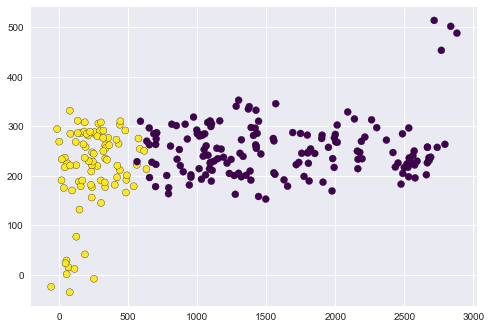

In [73]:
plt.scatter(X[:, 0], X[:, 1], c=y,cmap="viridis",edgecolor="black");

Just applying a scaler here.

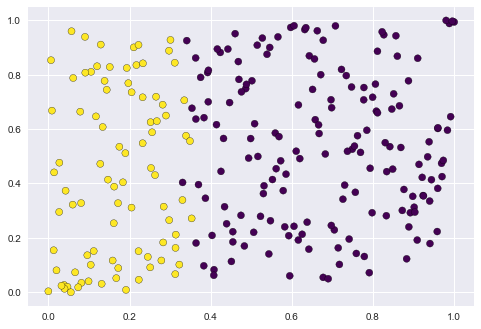

In [74]:
X_new = QuantileTransformer(n_quantiles=100).fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, cmap="viridis",edgecolor="black");

Function to deal with the plotting.

In [75]:
def plot_output(scaler):
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])

    pred = pipe.fit(X, y).predict(X)

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=y,cmap="viridis",edgecolor="black")
    plt.title("Original Data")
    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y,cmap="viridis",edgecolor="black")
    plt.title("Transformed Data")
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (5000, 1)), 
        np.random.uniform(0, X[:, 1].max(), (5000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7,cmap="viridis",edgecolor="black")
    plt.title("Predicted Data")

Effect of StandardScaler

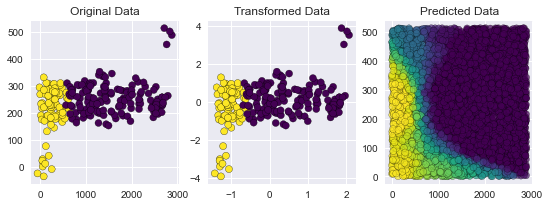

In [76]:
plot_output(scaler=StandardScaler())

Effect of QuantileTransformer

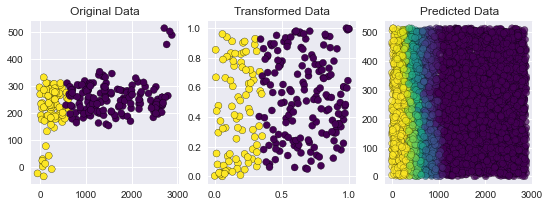

In [77]:
plot_output(scaler=QuantileTransformer(n_quantiles=100))

# New Dataset

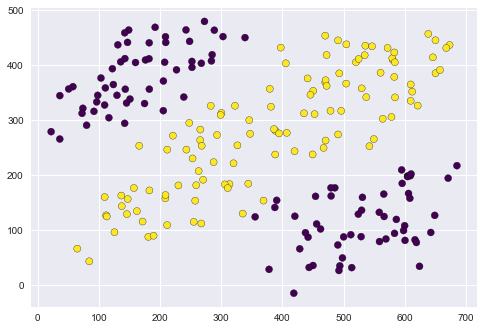

In [78]:
df = pd.read_csv("drawndata2.csv")
X = df[['x', 'y']].values
y = df['z'] == 'a'
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis",edgecolor="black");

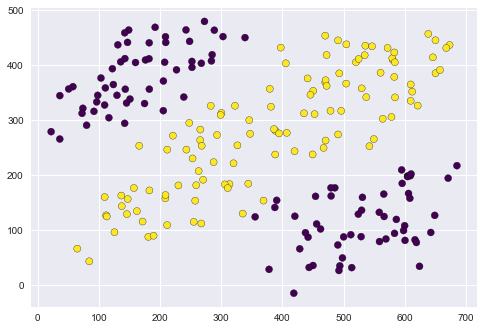

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", PolynomialFeatures()),
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred, cmap="viridis",edgecolor="black");

# One Hot Encoding

In [80]:
arr = np.array(["low", "low", "high", "medium"]).reshape(-1, 1)
arr

array([['low'],
       ['low'],
       ['high'],
       ['medium']], dtype='<U6')

In [81]:
from sklearn.preprocessing import OneHotEncoder

In [82]:
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [83]:
enc.transform([["zero"]])

array([[0., 0., 0.]])